In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('coronavirus.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [5]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [10]:
df['Date']=le.fit_transform(df['Date'].astype('str'))
df['Country']=le.fit_transform(df['Country'].astype('str'))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Date       23688 non-null  int32
 1   Country    23688 non-null  int32
 2   Confirmed  23688 non-null  int64
 3   Recovered  23688 non-null  int64
 4   Deaths     23688 non-null  int64
dtypes: int32(2), int64(3)
memory usage: 740.4 KB


In [12]:
df.head(10)

,Date,Country,Confirmed,Recovered,Deaths
0,0,0,0,0,0
1,0,1,0,0,0
2,0,2,0,0,0
3,0,3,0,0,0
4,0,4,0,0,0
5,0,5,0,0,0
6,0,6,0,0,0
7,0,7,0,0,0
8,0,8,0,0,0
9,0,9,0,0,0


In [13]:
df.tail(10)

,Date,Country,Confirmed,Recovered,Deaths
23678,50,178,266599,1161,37130
23679,50,179,789,638,22
23680,50,180,3290,2636,14
23681,50,181,1211,302,11
23682,50,182,327,272,0
23683,50,183,429,365,3
23684,50,184,9,6,1
23685,50,185,249,10,49
23686,50,186,920,336,7
23687,50,187,56,25,4


In [14]:
df.corr()

,Date,Country,Confirmed,Recovered,Deaths
Date,1.000000,0.000000,-0.067560,-0.084026,-0.071036
Country,0.000000,1.000000,0.069204,0.019298,0.064954
Confirmed,-0.067560,0.069204,1.000000,0.810991,0.929718
Recovered,-0.084026,0.019298,0.810991,1.000000,0.778094
Deaths,-0.071036,0.064954,0.929718,0.778094,1.000000


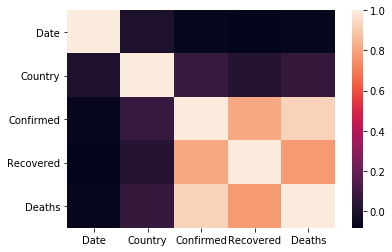

In [15]:
sns.heatmap(df.corr())

In [16]:
# From the above Heatmap we can analyse that there is high corelation between confirmed cases and recovered cases and Deaths

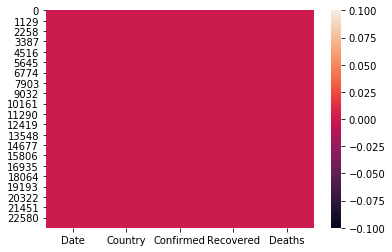

In [19]:
sns.heatmap(df.isnull())

In [18]:
#From the Above figure we can see that there is no Null-values present in this data

In [20]:
df.describe()

,Date,Country,Confirmed,Recovered,Deaths
count,23688.000000,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,62.500000,93.500000,7.969368e+03,2581.801714,526.935030
std,36.372689,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,31.000000,46.750000,0.000000e+00,0.000000,0.000000
50%,62.500000,93.500000,1.800000e+01,1.000000,0.000000
75%,94.000000,140.250000,7.300000e+02,123.000000,13.000000
max,125.000000,187.000000,1.680913e+06,384902.000000,98913.000000


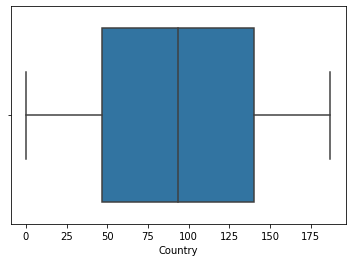

In [21]:
sns.boxplot(df['Country'])

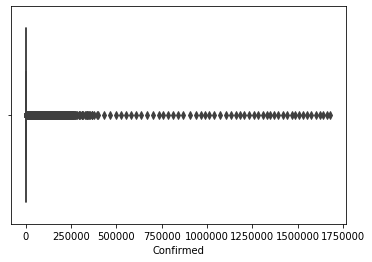

In [22]:
sns.boxplot(df['Confirmed'])

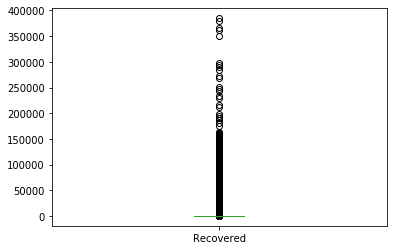

In [24]:
df['Recovered'].plot.box()

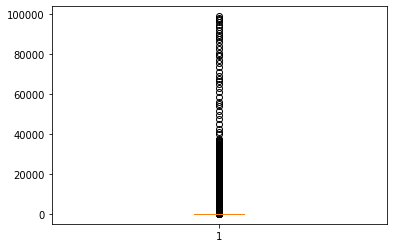

In [26]:
plt.boxplot(df['Deaths'])
plt.show()

In [27]:
# From the AboveBoxPlots we can see that there are many outliers present in this Data set

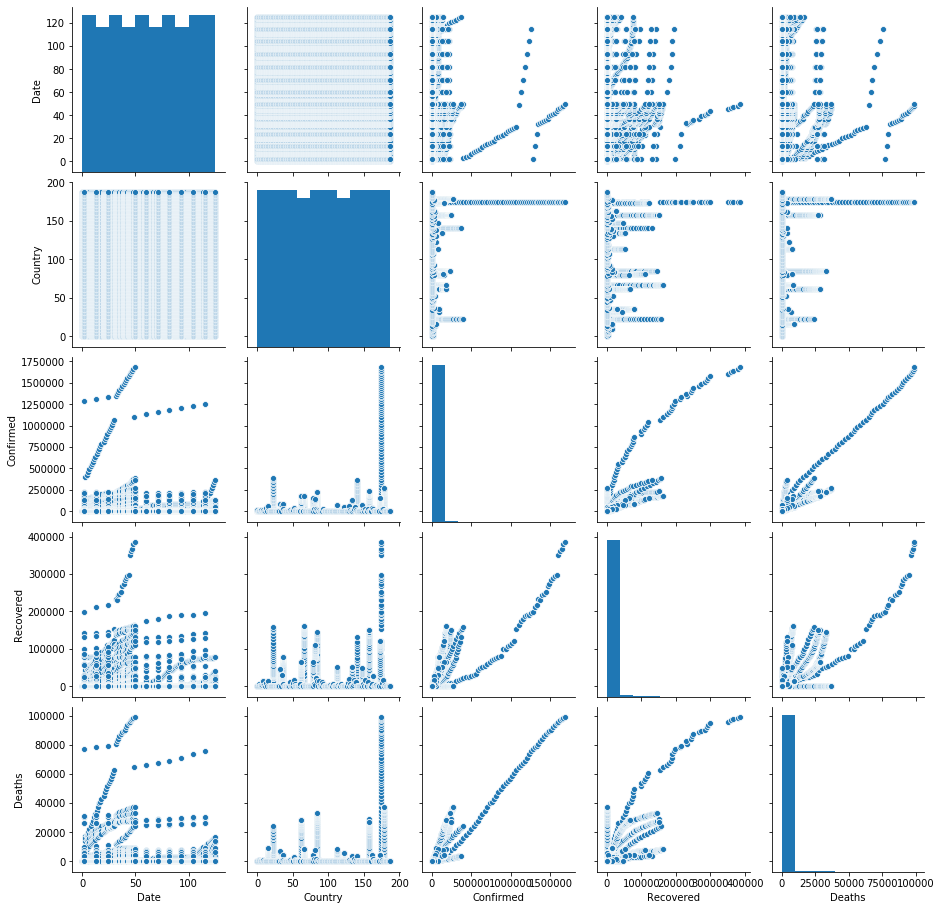

In [28]:
sns.pairplot(df)

In [29]:
# To remove the out Liers

In [30]:
from scipy.stats import zscore

In [31]:
z=np.abs(zscore(df))
z

array([[1.71835849, 1.72286214, 0.13641539, 0.17049719, 0.13197356],
       [1.71835849, 1.70443581, 0.13641539, 0.17049719, 0.13197356],
       [1.71835849, 1.68600948, 0.13641539, 0.17049719, 0.13197356],
       ...,
       [0.3436717 , 1.68600948, 0.13215314, 0.16983681, 0.11970126],
       [0.3436717 , 1.70443581, 0.12066732, 0.1483084 , 0.13022038],
       [0.3436717 , 1.72286214, 0.13545681, 0.16884624, 0.13097174]])

In [32]:
threshold=3
np.where(z>3)

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
         9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
        11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
        13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
        13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
        14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
        14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
        14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
        15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
        15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
        15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
        15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
        15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
        15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
      

In [33]:
df1=df[(z<3).all(axis=1)]
df1

,Date,Country,Confirmed,Recovered,Deaths
0,0,0,0,0,0
1,0,1,0,0,0
2,0,2,0,0,0
3,0,3,0,0,0
4,0,4,0,0,0
...,...,...,...,...,...
23683,50,183,429,365,3
23684,50,184,9,6,1
23685,50,185,249,10,49
23686,50,186,920,336,7


In [35]:
df.shape

(23688, 5)

In [36]:
# Here we can see that around 510 rows are deleted as OutLiers

In [37]:
x=df1.iloc[:,0:4]
x.head()

,Date,Country,Confirmed,Recovered
0,0,0,0,0
1,0,1,0,0
2,0,2,0,0
3,0,3,0,0
4,0,4,0,0


In [38]:
y=df1.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23177, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [40]:
max_r_score=0
for r_state in range(40,105):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
    linr=LinearRegression()
    linr.fit(x_train,y_train)
    predlinr=linr.predict(x_test)
    r2score=r2_score(y_test,predlinr)
    if (r2score>max_r_score):
        max_r_score=r2score
        final_r_state=r_state
print("")
print("The max r2 score corresponding to",final_r_state,'is',max_r_score)
    


The max r2 score corresponding to 80 is 0.6367791358161026


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=80)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(18541, 4)
(18541,)
(4636, 4)
(4636,)


In [44]:
linr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
linr.score(x_train,y_train)

0.5589925430718636

In [46]:
predlinr=linr.predict(x_test)

In [47]:
print('R2-Score=', r2_score(y_test,predlinr))

R2-Score= 0.6367791358161026


In [48]:
print(mean_absolute_error(y_test,predlinr))
print('RMSE=',np.sqrt(mean_squared_error(y_test,predlinr)))

93.33196432095198
RMSE= 411.4271055275806


In [49]:
linr.coef_

array([ 0.09665147, -0.32496243,  0.05169461, -0.00521365])

In [50]:
linr.intercept_

14.303226431635906

In [51]:
# We can use Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf=RandomForestRegressor(n_estimators=150,random_state=80)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9943872194821403

In [55]:
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))

0.9647285092210081


In [56]:
# NOW WE ARE TRYING USING REGULARISATION TECHNIQUES(LASSO & RIDGE)

In [57]:
from sklearn.linear_model import Lasso, Ridge

In [59]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5589925430718612

In [61]:
rd=Ridge(alpha=.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5589925430718636

In [4]:
from sklearn.externals import joblib